# --- NFL Big Data Bowl 2026: Project Oracle ---
Phase 1.2: Data Ingestion and Exploration

This notebook serves as the initial entry point for understanding the dataset.
We will load a sample week's worth of data (input, output, and supplementary) to inspect its structure, data types, and basic statistics.

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path

In [26]:
# --- 1. Load Data ---
# Define file paths for clarity and easy modification.
DATA_DIR = Path("../data/raw/")
TRAIN_DIR = DATA_DIR / "train"
WEEK_TO_LOAD = 1 # We use Week 1 as a representative sample for EDA.

supplementary_path = DATA_DIR / "supplementary_data.csv"
input_path = TRAIN_DIR / f"input_2023_w{WEEK_TO_LOAD:02d}.csv"
output_path = TRAIN_DIR / f"output_2023_w{WEEK_TO_LOAD:02d}.csv"

# Load the three core data files into pandas DataFrames.
try:
    supplementary_df = pd.read_csv(supplementary_path)
    input_df = pd.read_csv(input_path)
    output_df = pd.read_csv(output_path)
    print("Successfully loaded all three data files for Week 1.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the data files are in the 'data/raw' directory.")

C:\Users\User\AppData\Local\Temp\ipykernel_7292\437379625.py:13: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_df = pd.read_csv(supplementary_path)


Successfully loaded all three data files for Week 1.


In [27]:
# --- 2. Initial Inspection: Data Shape, Types, and Memory ---
# This step is crucial for understanding the structure and identifying potential issues.
print("\n--- Supplementary Data Info ---")
supplementary_df.info()

print("\n--- Week 1 Input Data Info ---")
input_df.info()

print("\n--- Week 1 Output Data Info ---")
output_df.info()


--- Supplementary Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18009 entries, 0 to 18008
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   game_id                                18009 non-null  int64  
 1   season                                 18009 non-null  int64  
 2   week                                   18009 non-null  int64  
 3   game_date                              18009 non-null  object 
 4   game_time_eastern                      18009 non-null  object 
 5   home_team_abbr                         18009 non-null  object 
 6   visitor_team_abbr                      18009 non-null  object 
 7   play_id                                18009 non-null  int64  
 8   play_description                       18009 non-null  object 
 9   quarter                                18009 non-null  int64  
 10  game_clock                           

In [28]:
# --- 3. Descriptive Statistics ---
# Get a statistical summary of the numerical columns to understand their scale and distribution.
print("\n--- Supplementary Data Descriptive Statistics (Numerical Columns) ---")
print(supplementary_df.describe().round(2))

print("\n--- Week 1 Input Data Descriptive Statistics (Numerical Columns) ---")
print(input_df.describe().round(2))


--- Supplementary Data Descriptive Statistics (Numerical Columns) ---
            game_id    season      week   play_id   quarter      down  \
count  1.800900e+04  18009.00  18009.00  18009.00  18009.00  18009.00   
mean   2.023407e+09   2023.22     10.88   2195.70      2.58      1.96   
std    5.381581e+05      0.41      5.45   1252.67      1.12      0.86   
min    2.023091e+09   2023.00      1.00     54.00      1.00      1.00   
25%    2.023102e+09   2023.00      6.00   1137.00      2.00      1.00   
50%    2.023113e+09   2023.00     12.00   2170.00      3.00      2.00   
75%    2.024011e+09   2023.00     16.00   3257.00      4.00      3.00   
max    2.025011e+09   2024.00     18.00   5258.00      5.00      4.00   

       yards_to_go  yardline_number  pre_snap_home_score  \
count     18009.00         18009.00             18009.00   
mean          8.73            30.39                11.59   
std           3.95            12.25                 9.88   
min           1.00             


Visualizing a long pass play: Game ID 2023090700, Play ID 101
Play Description: (14:25) (Shotgun) J.Goff pass incomplete deep right to J.Reynolds.


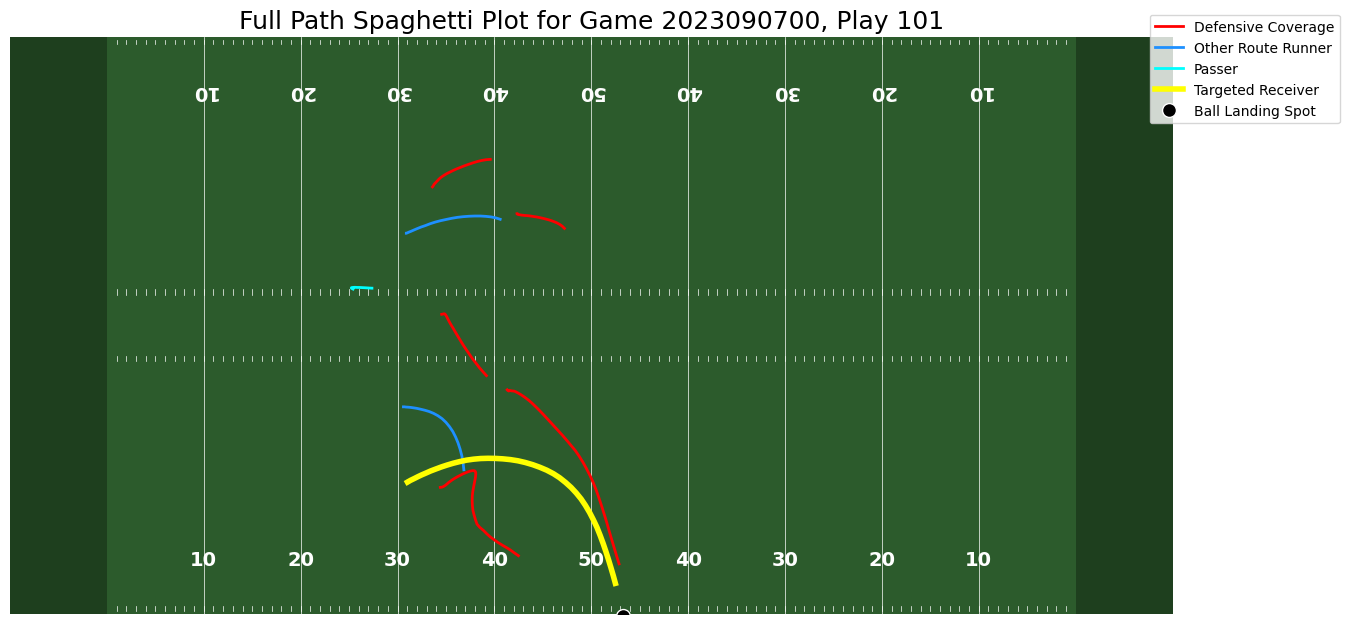

In [29]:
# --- 4. Visualization: Full Play Spaghetti Plot ---
# This is the most important part of EDA: turning the numbers into a visual story.

def create_football_field(ax):
    """
    Adds a detailed, visually appealing football field to a matplotlib axes object.
    """
    # Field outline
    ax.add_patch(patches.Rectangle((0, 0), 120, 53.3, facecolor='#2c5b2c', zorder=0)) # Darker green

    # Endzones
    ax.add_patch(patches.Rectangle((0, 0), 10, 53.3, facecolor='#1e3f1e', zorder=0))
    ax.add_patch(patches.Rectangle((110, 0), 10, 53.3, facecolor='#1e3f1e', zorder=0))

    # Yard lines
    for x in range(20, 110, 10):
        ax.axvline(x, color='white', linestyle='-', linewidth=0.5, zorder=1)

    # Yard numbers
    for x in range(20, 60, 10):
        ax.text(x, 5, str(x-10), color='white', fontsize=14, ha='center', va='center', weight='bold')
        ax.text(x, 53.3-5, str(x-10), color='white', fontsize=14, ha='center', va='center', rotation=180, weight='bold')
    for x in range(60, 110, 10):
        ax.text(x, 5, str(110-x), color='white', fontsize=14, ha='center', va='center', weight='bold')
        ax.text(x, 53.3-5, str(110-x), color='white', fontsize=14, ha='center', va='center', rotation=180, weight='bold')

    # Hash marks
    for x in range(11, 110):
        ax.plot([x, x], [0.3, 0.7], color='white', linewidth=0.5, zorder=1)
        ax.plot([x, x], [52.6, 53.0], color='white', linewidth=0.5, zorder=1)
        ax.plot([x, x], [23.35, 23.85], color='white', linewidth=0.5, zorder=1)
        ax.plot([x, x], [29.45, 29.95], color='white', linewidth=0.5, zorder=1)

    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.axis('off')
    return ax

# --- Select a representative play to visualize ---
# We merge with supplementary data to find an interesting play, like a long pass.
merged_df_for_selection = pd.merge(input_df, supplementary_df, on=['game_id', 'play_id'])
# Find the first play with a pass length over 20 yards to ensure it's a downfield throw.
long_pass_play = merged_df_for_selection[merged_df_for_selection['pass_length'] > 20].iloc[0]
game_id_to_plot = long_pass_play['game_id']
play_id_to_plot = long_pass_play['play_id']

print(f"\nVisualizing a long pass play: Game ID {game_id_to_plot}, Play ID {play_id_to_plot}")
print(f"Play Description: {long_pass_play['play_description']}")

# --- Isolate and Combine Data for the Full Play Path ---
# 1. Get the pre-throw data (input)
play_input_df = input_df[(input_df['game_id'] == game_id_to_plot) & (input_df['play_id'] == play_id_to_plot)]
# 2. Get the post-throw data (output)
play_output_df = output_df[(output_df['game_id'] == game_id_to_plot) & (output_df['play_id'] == play_id_to_plot)]

# --- Plot the FULL Play ---
fig, ax = plt.subplots(figsize=(15, 7.5))
ax = create_football_field(ax)

# Get unique players from the input data to ensure we plot everyone on the play.
player_ids = play_input_df['nfl_id'].unique()

# Loop through each player to plot their combined pre- and post-throw path.
for pid in player_ids:
    player_input_data = play_input_df[play_input_df['nfl_id'] == pid].sort_values('frame_id')
    player_output_data = play_output_df[play_output_df['nfl_id'] == pid].sort_values('frame_id')

    # Combine the paths into one continuous trajectory.
    full_path_df = pd.concat([player_input_data[['x', 'y']], player_output_data[['x', 'y']]])

    # Get player metadata for coloring and labeling.
    player_info = player_input_data.iloc[0]
    player_side = player_info['player_side']
    player_role = player_info['player_role']

    # Assign colors and styles based on role.
    color = 'gray'
    linewidth = 2
    zorder = 2

    if player_side == 'Offense': color = 'dodgerblue'
    elif player_side == 'Defense': color = 'red'
    if player_role == 'Passer': color = 'cyan'
    if player_role == 'Targeted Receiver':
        color = 'yellow'
        linewidth = 4
        zorder = 3 # Ensure the targeted receiver is drawn on top.

    ax.plot(full_path_df['x'], full_path_df['y'], color=color, linewidth=linewidth, zorder=zorder, label=player_role)

# Mark the ball's landing spot for context.
ball_land_x = play_input_df['ball_land_x'].iloc[0]
ball_land_y = play_input_df['ball_land_y'].iloc[0]
ax.plot(ball_land_x, ball_land_y, 'ko', markersize=10, zorder=4, label='Ball Landing Spot', markeredgecolor='white')

# Create a clean, de-duplicated legend.
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.15, 1.05), facecolor='white', framealpha=0.8)

ax.set_title(f"Full Path Spaghetti Plot for Game {game_id_to_plot}, Play {play_id_to_plot}", fontsize=18)
plt.show()
